In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from transformers import pipeline

In [6]:
# Gradio interface function
def predict_sentiment(text):
    result = model(text)
    sentiment = result[0]['label']
    if sentiment == 1:
      return "Positive"
    elif sentiment == "2":
      return "Negative"
    else:
      return "Neutral"

In [7]:
# Predefined examples
predefined_examples = [
    "গবেষণার কাজে আমাদের সাহায্য করার জন্য রাইজকে অসংখ্য ধন্যবাদ",
              "আমি বুয়েট এনএলপি এর হাগিং ফেস মডেলগুলি ব্যবহার করতে ভালোবাসি!",
              "এই বইটি বিজ্ঞান ও প্রযুক্তির সমৃদ্ধি সম্পর্কে বিস্তারিত জ্ঞান প্রদান করে।",
              "আমি খুব কষ্ট পাচ্ছি", "মডেলটি সঠিকভাবে অনুভূতি ধরতে ব্যর্থ হয়েছে।",
    "আমার জীবন এখন একটি অস্বাভাবিক দুঃখে ভরা আছে।",
              "এই বিষয়ে আমার কোন অভিজ্ঞতা নেই।",
              "আমি এই ব্যাপারে কিছুই জানি না",
    "আমি এই বইটি ভালোভাবে পড়তে পাচ্ছি",
    "এটি একটি অসাধারণ অভিজ্ঞতা ছিল",
    "আমার মনে হয় এই ফিল্মটি পুরস্কৃত হওয়া উচিত"
]

### Model Testing

In [8]:
CONTEXT_LENGTH = 512
model = pipeline(task="sentiment-analysis", model="skl25/banglabert-sentiment")

predict_sentiment("আমি তোমাকে ঘৃণা করি ")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


'Positive'

In [10]:
for example in predefined_examples:
  print(f"{example} -> {predict_sentiment(example)}")

গবেষণার কাজে আমাদের সাহায্য করার জন্য রাইজকে অসংখ্য ধন্যবাদ -> Positive
আমি বুয়েট এনএলপি এর হাগিং ফেস মডেলগুলি ব্যবহার করতে ভালোবাসি! -> Neutral
এই বইটি বিজ্ঞান ও প্রযুক্তির সমৃদ্ধি সম্পর্কে বিস্তারিত জ্ঞান প্রদান করে। -> Positive
আমি খুব কষ্ট পাচ্ছি -> Neutral
মডেলটি সঠিকভাবে অনুভূতি ধরতে ব্যর্থ হয়েছে। -> Neutral
আমার জীবন এখন একটি অস্বাভাবিক দুঃখে ভরা আছে। -> Neutral
এই বিষয়ে আমার কোন অভিজ্ঞতা নেই। -> Neutral
আমি এই ব্যাপারে কিছুই জানি না -> Neutral
আমি এই বইটি ভালোভাবে পড়তে পাচ্ছি -> Positive
এটি একটি অসাধারণ অভিজ্ঞতা ছিল -> Positive
আমার মনে হয় এই ফিল্মটি পুরস্কৃত হওয়া উচিত -> Positive


### SBNLTK Bert

In [9]:
!pip3 install sbnltk
!pip3 install simpletransformers
!pip3 install fasttext
!pip3 install scikit-learn

  Using cached fasttext-0.9.3.tar.gz (73 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.5-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.5-py3-none-any.whl (240 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246561 sha256=631c6acd544687f4e3b94a23bf019de3092c998d355d788a3964f5220cc23cdb
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [16]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [18]:
!pip install tfa-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.3/620.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [20]:
import tensorflow as tf
from sbnltk.SentimentAnalyzer import sentimentAnalyzer

# Ensure the SentimentAnalyzer is correctly initialized
sa = sentimentAnalyzer()

# Function to convert inputs to the appropriate format
def preprocess_texts(texts):
    # Here, you would add any preprocessing steps required by your BERT model
    return [tf.convert_to_tensor(text) for text in texts]

# Texts for prediction
texts = ['তাঁকে বাংলা ভাষার সর্বশ্রেষ্ঠ সাহিত্যিক মনে করা হয়',
         'সে আমার ক্লাসের খারাপ ছেলে',
         'তিনি এই কাজটি করতে চান না',
         'সে তার ক্লাসে সর্বোচ্চ স্কোর পায়']

# Preprocess texts (if necessary)
texts = preprocess_texts(texts)

# Predict sentiment
predictions = sa.predict('BERT', texts)

# Output the predictions
print(predictions)

# Expected format: ([predicted_labels], [confidence_scores])


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}

loading weights file model.safetensors f

ValueError: Exception encountered when calling layer 'tf_bert_model_1' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for input_ids.

Call arguments received by layer 'tf_bert_model_1' (type TFBertModel):
  • input_ids=['<KerasTensor shape=(None, 147), dtype=int32, sparse=None, name=input_word_ids>', '<KerasTensor shape=(None, 147), dtype=int32, sparse=None, name=input_masks>', '<KerasTensor shape=(None, 147), dtype=int32, sparse=None, name=input_segment>']
  • attention_mask=None
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [24]:
from sbnltk.SentimentAnalyzer import sentimentAnalyzer
sa=sentimentAnalyzer()
print(sa.predict('LR',['তাঁকে বাংলা ভাষার সর্বশ্রেষ্ঠ সাহিত্যিক মনে করা হয়','সে আমার ক্লাসের খারাপ ছেলে',
                       'তিনি এই কাজটি করতে চান না','সে তার ক্লাসে সর্বোচ্চ স্কোর পায়']))

# ([1, 0, 0, 1], [0.6449975713588612, 0.45778114564313, 0.46393594035665886, 0.8066192798190904])

ValueError: Error when downloading model!! Check internet Connection!!

### Sentiment Analysis for our dataset

In [7]:
import joblib
nonethnic_articles = joblib.load("/content/drive/MyDrive/Representation Discrimination/data/nonethnic_dataset_100k.joblib")
nonethnic_articles[0]

'<p>কার্তিক শেষ হলো কাল। আজ অগ্রহায়ণের প্রথম দিন। শীতের আগমনী বার্তা এখন রাজধানীর আকাশে-বাতাসে। এমন আবহাওয়ায় গতকাল সন্ধ্যায় সেগুনবাগিচার শিল্পকলা একাডেমির জাতীয় নাট্যশালায় মিলনায়তন নিক্বণধ্বনিতে জমে উঠেছিল। এখানে শুরু হয় নয় দিনের দ্বিতীয় জাতীয় নৃত্যনাট্য উৎসব।<br />সোমবার সন্ধ্যায় শিল্পকলা একাডেমির মূল হলে উৎসবের উদ্বোধন করেন অর্থমন্ত্রী আবুল মাল আবদুল মুহিত। অর্থমন্ত্রী সমাজ রক্ষা, উন্নয়ন, মানবিক গুণাবলি বিকাশের জন্যও নৃত্যনাট্য চর্চার গুরুত্ব রয়েছে বলে মন্তব্য করেন। তিনি বলেন, ‘সংস্কৃতির নানা মাধ্যমের মধ্যে নৃত্যনাট্য একটি শক্তিশালী মাধ্যম, যা নানা শিক্ষা দেয়। এই মাধ্যম থেকে রস আস্বাদন করে আমরা সমৃদ্ধ হতে পারি।’<br />অনুষ্ঠানে বিশেষ অতিথির বক্তব্য দেন সংস্কৃতিসচিব আকতারী মমতাজ। আরও বক্তব্য দেন নাট্যব্যক্তিত্ব নাসির উদ্দীন ইউসুফ, প্রবীণ নৃত্যশিল্পী রাহিজা খানম ও বাংলাদেশ নৃত্যশিল্পী সংস্থার সভাপতি মিনু হক। সভাপতিত্ব করেন শিল্পকলা একাডেমির মহাপরিচালক লিয়াকত আলী। রাহিজা খানম সংস্কৃতি খাতে বাজেটের অপ্রতুলতার দিকটি তুলে ধরে বলেন, ‘বাজেটের জন্য আমরা অনেক ভালো কাজ করতে চেয়েও পারি না।’ তার 

In [8]:
import pandas as pd
ethnic_articles = pd.read_csv("/content/drive/MyDrive/Representation Discrimination/data/ethnic_dataset_4893_after_removing_rakhain.csv")["content"].values.tolist()
ethnic_articles[0]

'রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গামাটি প্রতিনিধিরাঙ্গামাটিতে পাহাড়ি ছাত্র পরিষদের (পিসিপি) নেতা রমেল চাকমার মৃত্যু নিয়ে অভিযোগ তদন্তে কার্যক্রম শুরু করেছে জাতীয় মানবাধিকার কমিশন। ঘটনাটিকে হত্যা দাবি করে নির্যাতনের কারণে রমেলের মৃত্যু হয়েছে বলে অভিযোগ করা হয়। এ ঘটনায় অভিযোগ তদন্তে তিন সদস্যের একটি কমিটি গঠন করে জাতীয় মানবাধিকার কমিশন। তদন্ত কমিটিতে জাতীয় মানবাধিকার কমিশনের সদস্য ও রাঙ্গামাটি সরকারি কলেজের সাবেক অধ্যক্ষ প্রফেসর বাঞ্চিতা চাকমাকে আহ্বায়ক, কমিশনের রাঙ্গামাটি অফিসের উপ-পরিচালক গাজী মো. সালাউদ্দিনকে সদস্যসচিব ও রাঙ্গামাটি জেলা প্রশাসনের নির্বাহী ম্যাজিস্ট্রেট অলি উজ্জামানকে সদস্য করা হয়েছে।সোনাগাজীতে অস্ত্রসহ যুবলীগ নেতা গ্রেফতারফেনী প্রতিনিধিফেনীর সোনাগাজী উপজেলার চরমজলিশপুর ইউনিয়নের কুঠিরহাটে ১টি বিদেশী পিস্তল ও ৪ রাউন্ড গুলিসহ যুবলীগ নেতা কামালকে গ্রেফতার করেছে পুলিশ। কামাল মজলিশপুরের আওয়ামী লীগের সাবেক সভাপতি মনজুতের রহমানের ছেলে ও ইউনিয়ন যুবলীগের সাবেক যুগ্ম-আহ্বায়ক। পুলিশ সূত্রে জানা যায়, গোপন সংবাদের ভিত্তিতে মঙ্গলবার সকাল ১১টা কুঠিরহাট বাজারে অভিযান চালি

In [12]:
from tqdm import tqdm
sentiments = []

for ethnic_article in tqdm(ethnic_articles, desc="article "):
  sentiments.append(predict_sentiment(ethnic_article[:CONTEXT_LENGTH]))

article : 100%|██████████| 4893/4893 [39:25<00:00,  2.07it/s]


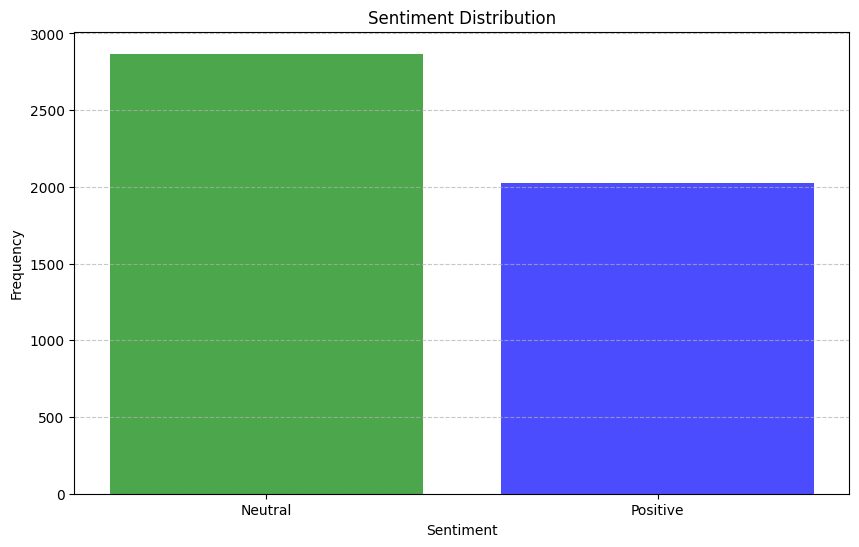

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

sentiment_counts = Counter(sentiments)

# Separate the sentiment labels and their counts
labels, counts = zip(*sentiment_counts.items())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['green', 'blue', 'red'], alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()